Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

# Strojno učenje

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

Ak. god. 2015./2016.

# Bilježnica 1: Uvodni primjeri

(c) 2015 Jan Šnajder

<i>Verzija: 0.8 (2015-10-15)</i>

In [81]:
# Učitaj osnovne biblioteke...
import scipy as sp
import sklearn
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Sadržaj:

* Klasifikacija: Preživjeli s Titanika

* Regresija: Cijene nekretnina u Bostonu

* Grupiranje: Rukom pisane znamenke

# Klasifikacija: Preživjeli s Titanika

<img src="https://upload.wikimedia.org/wikipedia/commons/f/fd/RMS_Titanic_3.jpg" width="100%">

### Podatci

* http://lib.stat.cmu.edu/S/Harrell/data/descriptions/titanic.html
* https://www.kaggle.com/c/titanic/data

<PRE>
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
</PRE>

In [32]:
titanic_df = pd.read_csv("../data/titanic-train.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [33]:
titanic_df.drop(['PassengerId'], axis=1, inplace=True)

In [34]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
titanic_df1 = titanic_df[['Pclass', 'Sex', 'Age','Survived']]
titanic_df1

,Pclass,Sex,Age,Survived
0,3,male,22,0
1,1,female,38,1
2,3,female,26,1
3,1,female,35,1
4,3,male,35,0
5,3,male,NaN,0
6,1,male,54,0
7,3,male,2,0
8,3,female,27,1
9,2,female,14,1


In [36]:
survivors = titanic_df1[titanic_df1['Survived']==1]
victims = titanic_df1[titanic_df1['Survived']==0]

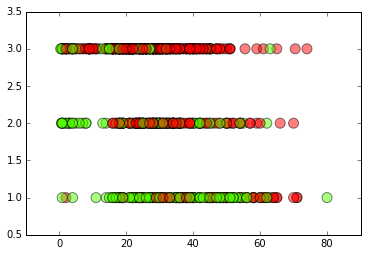

In [37]:
scatter(titanic_df1['Age'], titanic_df1['Pclass'], 
        c=titanic_df1['Survived'], cmap='prism', marker='o', s=100, alpha=0.5);

### Treniranje klasifikatora

In [38]:
titanic_X = titanic_df[['Pclass', 'Sex', 'Age']].as_matrix()
titanic_y = titanic_df['Survived'].as_matrix()

In [39]:
shape(titanic_X), shape(titanic_y)

((891, 3), (891,))

In [40]:
titanic_X

array([[3, 'male', 22.0],
       [1, 'female', 38.0],
       [3, 'female', 26.0],
       ..., 
       [3, 'female', nan],
       [1, 'male', 26.0],
       [3, 'male', 32.0]], dtype=object)

In [41]:
titanic_y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1,

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
titanic_X[:,1] = le.fit_transform(titanic_X[:,1])
print titanic_X

[[3 1 22.0]
 [1 0 38.0]
 [3 0 26.0]
 ..., 
 [3 0 nan]
 [1 1 26.0]
 [3 1 32.0]]


In [44]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
titanic_X = imp.fit_transform(titanic_X)
print titanic_X

[[  3.           1.          22.        ]
 [  1.           0.          38.        ]
 [  3.           0.          26.        ]
 ..., 
 [  3.           0.          29.69911765]
 [  1.           1.          26.        ]
 [  3.           1.          32.        ]]


In [45]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(titanic_X, titanic_y)

In [46]:
titanic_y_predicted = clf.predict(titanic_X)

In [47]:
titanic_df.insert(1,'Survior pred', titanic_y_predicted)
titanic_df

,Survived,Survior pred,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,1,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,0,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,0,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,0,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,1,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,1,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(titanic_y, titanic_y_predicted)

0.80920314253647585

In [49]:
from sklearn.externals.six import StringIO  
import pyparsing
import pydot
from IPython.display import Image
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data, feature_names=['Pclass', 'Sex', 'Age'])
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
img = Image(graph.create_png())

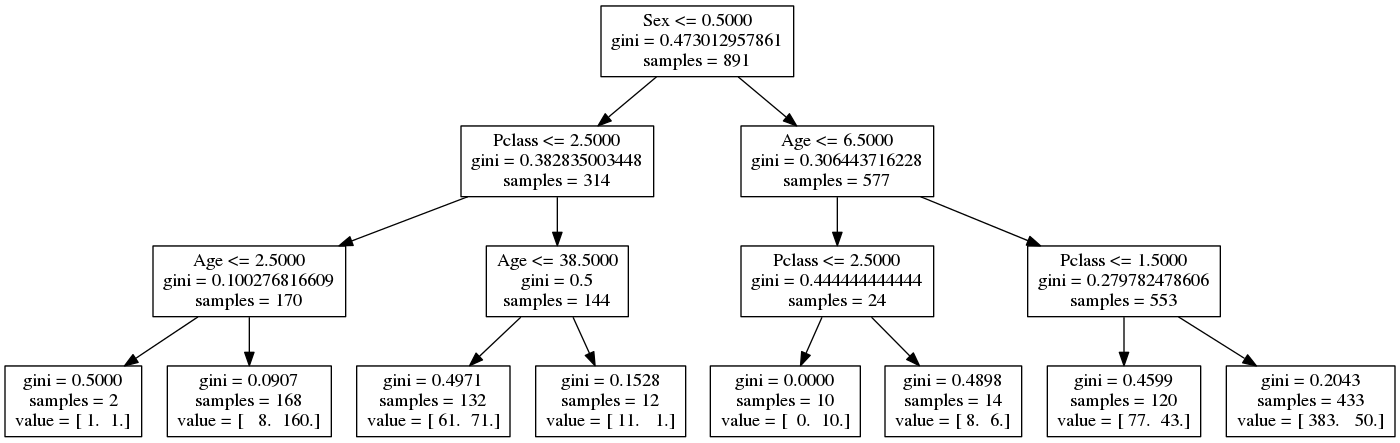

In [50]:
img.width=800; img

In [51]:
titanic_y_predicted_proba = clf.predict_proba(titanic_X)

In [52]:
titanic_df.insert(2,'Survior prob', titanic_y_predicted_proba[:,1])
titanic_df

,Survived,Survior pred,Survior prob,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0.115473,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,1,1,0.952381,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,1,1,0.537879,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,0.952381,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,0,0,0.115473,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,0,0,0.115473,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,0,0.358333,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,0,0,0.428571,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,1,1,0.537879,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,1,1,0.952381,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [53]:
# Pclass, Sex, Age
x_male_student = sp.array([3,1,21])
x_rich_countess = sp.array([1,0,65])
x_midleclass_mother = sp.array([2,0,40])
x_baby = sp.array([1,0,1])

In [54]:
clf.predict_proba(x_male_student)

array([[ 0.88452656,  0.11547344]])

In [55]:
clf.predict_proba(x_rich_countess)

array([[ 0.04761905,  0.95238095]])

In [56]:
clf.predict_proba(x_midleclass_mother)

array([[ 0.04761905,  0.95238095]])

In [57]:
clf.predict_proba(x_baby)

array([[ 0.5,  0.5]])

# Regresija: Cijene nekretnina u Bostonu

<img src="http://cdn1.bostonmagazine.com/wp-content/uploads/2014/03/shutterstock_138401321-1.jpg" width="100%">

### Podatci

In [58]:
from sklearn import datasets
boston = datasets.load_boston()
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [59]:
boston_df = pd.DataFrame(boston.data, 
    columns=['CRIM','ZN','IDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
boston_df.insert(13, 'Price', boston.target)
boston_df

,CRIM,ZN,IDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


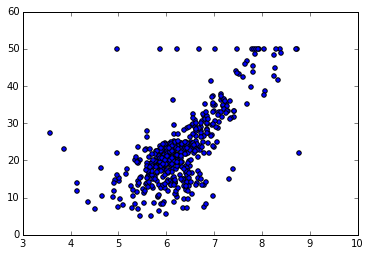

In [60]:
scatter(boston_df['RM'], boston_df['Price']);

### Treniranje regresijskog modela

In [61]:
boston_X = boston.data
boston_y = boston.target
shape(boston_X)

(506, 13)

In [62]:
from sklearn.linear_model import Ridge
h = Ridge(alpha=1.0)
h.fit(boston_X, boston_y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)

In [63]:
boston_y_predicted = h.predict(boston_X)

In [64]:
boston_df.insert(14, 'Price predicted', boston_y_predicted)
boston_df

,CRIM,ZN,IDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price,Price predicted
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.258005
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,24.809545
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.535338
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,28.913066
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,28.183422
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,25.440387
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,22.960449
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,19.300562
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,11.152173
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,18.820816


# Grupiranje: Rukom pisane znamenke

<img src="https://mathematicaforprediction.files.wordpress.com/2013/08/digitimageswithzenbrush-testset.jpg" width="100%">

### Podatci

In [65]:
digits = sklearn.datasets.load_digits()

In [66]:
print digits.DESCR

 Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is 

In [67]:
digits_X = digits.data
digits_y = digits.target

In [68]:
digits_X

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [69]:
shape(digits_X)

(1797, 64)

In [70]:
x = digits_X[0]; x

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [71]:
gray()
def show_digit(x) : 
    matshow(x.reshape(8,8))
    return

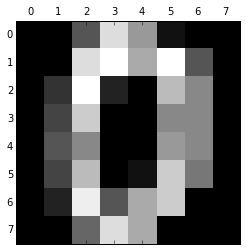

In [72]:
show_digit(x)

### Grupiranje algoritmom k-srednjih vrijednosti

In [73]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(digits_X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [74]:
digits_y_predicted = map(lambda x : kmeans.predict(x)[0], digits_X)
print digits_y_predicted

[5, 1, 1, 3, 8, 2, 7, 4, 2, 2, 5, 0, 9, 3, 8, 6, 7, 4, 1, 2, 5, 0, 9, 3, 8, 6, 7, 4, 1, 2, 5, 2, 6, 6, 7, 6, 5, 2, 1, 2, 1, 8, 0, 4, 4, 3, 6, 0, 5, 5, 1, 1, 4, 1, 4, 5, 0, 1, 7, 3, 3, 4, 3, 3, 8, 7, 7, 7, 8, 1, 0, 6, 5, 2, 6, 0, 1, 0, 5, 5, 0, 4, 7, 3, 9, 0, 4, 8, 7, 3, 0, 3, 3, 1, 4, 1, 1, 8, 3, 1, 8, 5, 6, 4, 7, 2, 7, 0, 4, 6, 8, 8, 4, 9, 1, 1, 1, 6, 4, 2, 6, 8, 1, 1, 8, 2, 5, 1, 2, 1, 5, 0, 9, 3, 8, 6, 7, 4, 1, 2, 5, 0, 9, 3, 8, 6, 7, 4, 1, 2, 5, 0, 9, 3, 8, 6, 7, 4, 1, 2, 5, 3, 6, 6, 7, 6, 5, 2, 1, 2, 1, 8, 0, 4, 4, 3, 6, 0, 5, 5, 9, 9, 4, 1, 9, 5, 0, 9, 7, 3, 3, 4, 3, 3, 8, 7, 7, 7, 1, 2, 0, 6, 5, 2, 6, 9, 1, 9, 5, 5, 0, 4, 7, 3, 9, 0, 4, 3, 0, 3, 2, 0, 4, 7, 1, 8, 3, 0, 8, 5, 6, 4, 7, 2, 7, 0, 4, 6, 1, 8, 4, 9, 1, 9, 9, 6, 6, 0, 1, 1, 8, 2, 5, 1, 2, 1, 5, 1, 9, 3, 8, 2, 7, 4, 2, 6, 5, 1, 9, 3, 8, 6, 7, 4, 1, 4, 5, 1, 9, 3, 8, 6, 7, 4, 1, 2, 5, 2, 6, 2, 7, 2, 5, 2, 1, 2, 1, 8, 1, 4, 4, 3, 6, 1, 5, 5, 9, 9, 4, 2, 9, 5, 0, 9, 7, 3, 3, 4, 3, 3, 8, 7, 7, 7, 8, 4, 1, 6, 5, 4, 6, 9, 2, 

In [75]:
from sklearn.decomposition import PCA
digits_X_reduced = PCA(n_components=2).fit_transform(digits_X)

In [76]:
shape(digits_X_reduced)

(1797, 2)

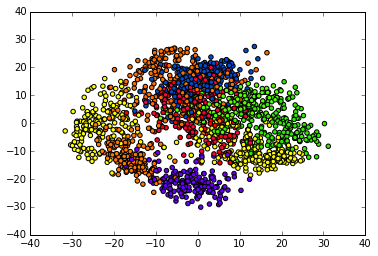

In [77]:
scatter(digits_X_reduced[:,0], digits_X_reduced[:,1], c=digits_y_predicted, cmap='prism');

In [78]:
kmeans.cluster_centers_

array([[  0.00000000e+00,   2.77555756e-16,   3.48837209e-02,
          1.86046512e+00,   1.10581395e+01,   1.29418605e+01,
          4.34883721e+00,   2.55813953e-01,   2.60208521e-18,
          5.81395349e-02,   2.06976744e+00,   9.09302326e+00,
          1.38139535e+01,   1.29534884e+01,   5.29069767e+00,
          2.55813953e-01,   1.30104261e-18,   1.69767442e+00,
          9.25581395e+00,   1.26162791e+01,   1.24069767e+01,
          1.33720930e+01,   3.83720930e+00,   9.30232558e-02,
         -1.08420217e-18,   3.80232558e+00,   1.23488372e+01,
          1.18604651e+01,   1.33720930e+01,   1.35232558e+01,
          2.25581395e+00,  -2.16840434e-18,   0.00000000e+00,
          1.74418605e+00,   6.43023256e+00,   6.94186047e+00,
          1.17674419e+01,   1.24302326e+01,   1.58139535e+00,
          0.00000000e+00,  -8.67361738e-18,   6.74418605e-01,
          1.61627907e+00,   3.40697674e+00,   1.18023256e+01,
          1.18720930e+01,   9.88372093e-01,  -6.93889390e-18,
        

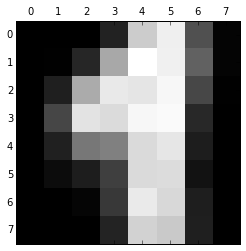

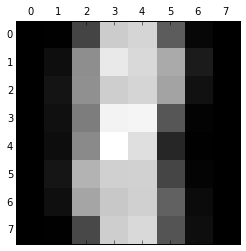

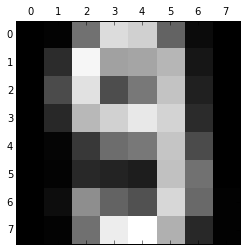

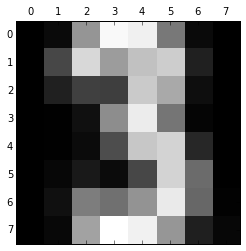

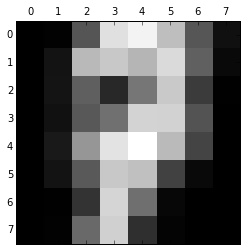

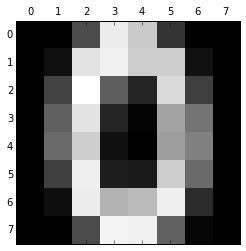

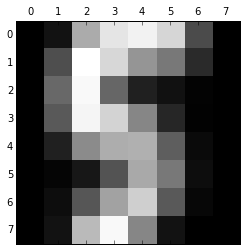

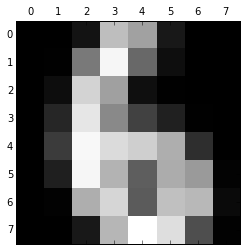

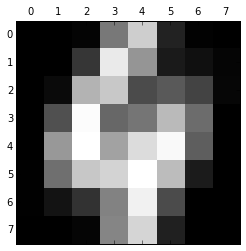

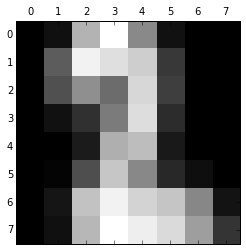

In [79]:
map(show_digit, kmeans.cluster_centers_);